In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('hotel_booking.csv')

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Removing un-related collums
The columns email, name, phone number and credit card are not related to the target variable. So dropping them from the dataset


In [10]:
del df['email']
del df['name']
del df['phone-number']
del df['credit_card']

### Handle missing values
Company column is null for most of the rows, so it is better to drop it rather than taking median 


In [11]:
del df['company']

In [12]:
df.children.value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

##### Values for children column should be in integer as it represents count. So convert it to integer while filling missing values with 0 

In [13]:
df.children = df.children.fillna(0).astype(int)

In [14]:
df.children.value_counts()

children
0     110800
1       4861
2       3652
3         76
10         1
Name: count, dtype: int64

##### Missing values for country column filled with most occurring value

In [15]:
df.country = df.country.fillna(df.country.mode()[0])

In [16]:
df.country.value_counts()

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [17]:
df.agent = df.agent.fillna(df.agent.median()).astype(int)

In [18]:
# check for missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [19]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
df[(df.reservation_status == 'Check-Out') & (df.is_canceled == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [21]:
df.reservation_status.value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [22]:
df.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

##### Based on the above data we see that reservation_status and reservation_status_date are correlated with is_canceled so can be dropped


In [23]:
del df['reservation_status']
del df['reservation_status_date']

## EDA

Lets analyze the data and see which features contribute to the target variable most

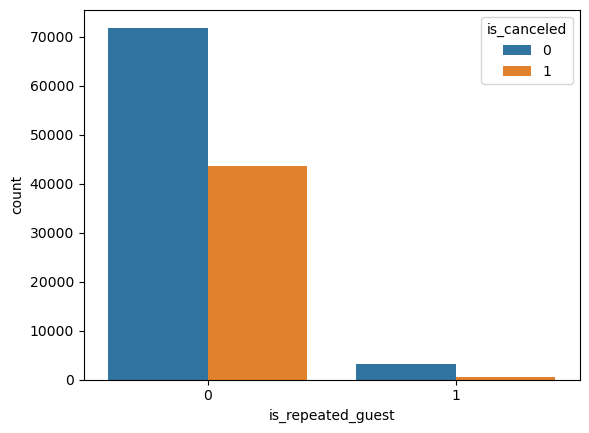

In [24]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.show()

##### Repeated guest feature does not seem to have much of an impact on cancellation as we see less bookings and cancellaitons for repeated guests

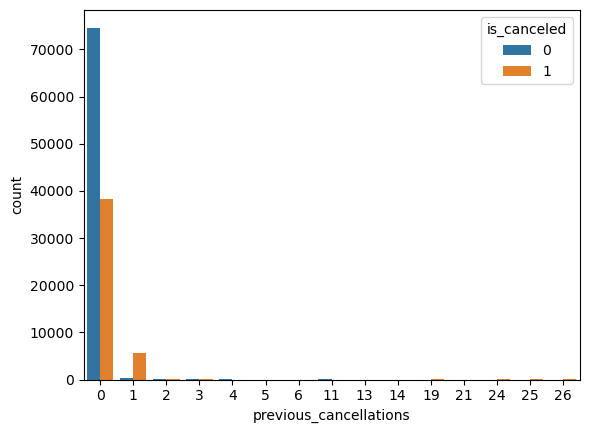

In [25]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')
plt.show()

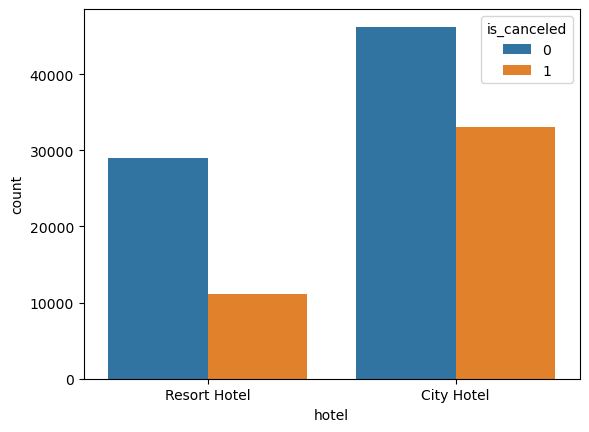

In [26]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.show()

##### CIty hotels get cancelled more often compared to resort hotels

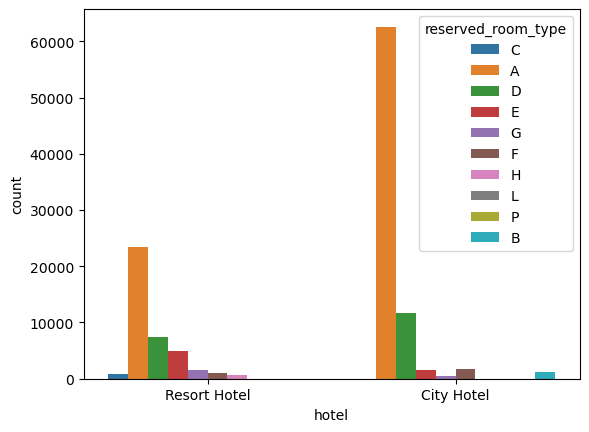

In [27]:
sns.countplot(data=df, x='hotel', hue='reserved_room_type')
plt.show()

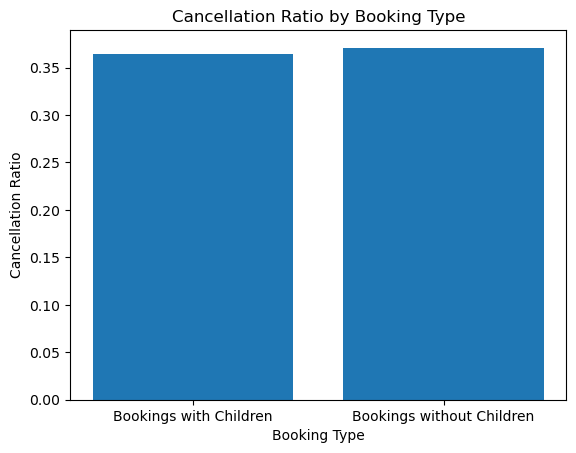

In [28]:
# Lets see how the cancellation pattern is related to child count in booking

# Calculate the cancellation ratio for bookings with children
children_bookings = df[df['children'] > 0]
cancellation_ratio_children = children_bookings['is_canceled'].mean()

# Calculate the cancellation ratio for bookings without children
no_children_bookings = df[df['children'] == 0]
cancellation_ratio_no_children = no_children_bookings['is_canceled'].mean()

# Create a bar chart
plt.bar(['Bookings with Children', 'Bookings without Children'],
         [cancellation_ratio_children, cancellation_ratio_no_children])

# Set the title and labels
plt.title('Cancellation Ratio by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Cancellation Ratio')

# Show the plot
plt.show()

###### Based on the above plot children count in the booking does not seem to impact cancellation

In [29]:
# Lets see different deposit types and cancellations for deposit

deposit_type_bookings = df.groupby('deposit_type')['hotel'].count().reset_index()
total_bookings = df.shape[0]
deposit_type_bookings['percentage'] = (deposit_type_bookings['hotel'] / total_bookings) * 100
deposit_type_bookings = deposit_type_bookings.sort_values(by='percentage', ascending=False)
deposit_type_bookings

,deposit_type,hotel,percentage
0,No Deposit,104641,87.646369
1,Non Refund,14587,12.217941
2,Refundable,162,0.135690


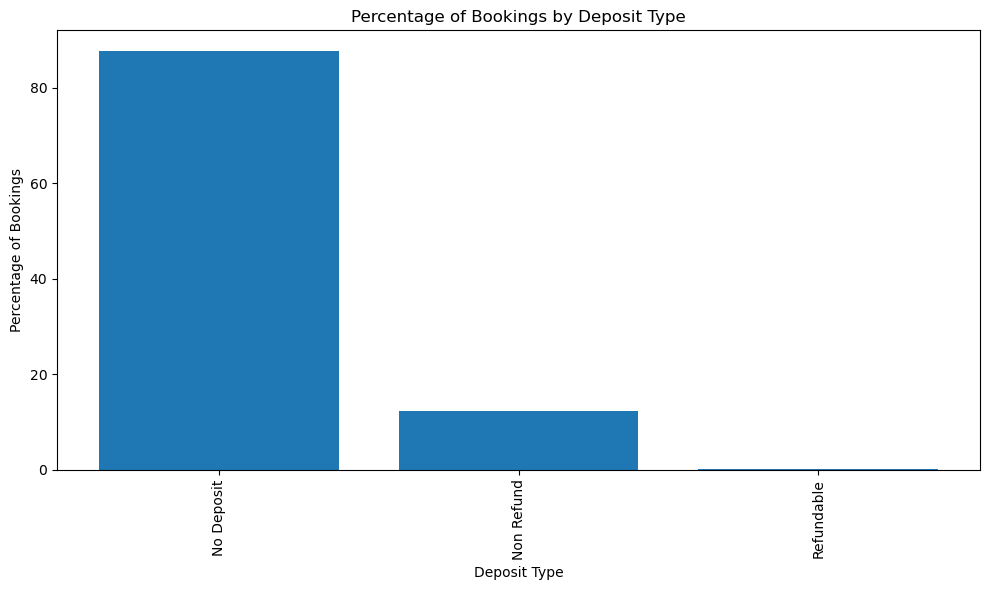

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(deposit_type_bookings['deposit_type'], deposit_type_bookings['percentage'])
plt.xlabel('Deposit Type')
plt.ylabel('Percentage of Bookings')
plt.title('Percentage of Bookings by Deposit Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

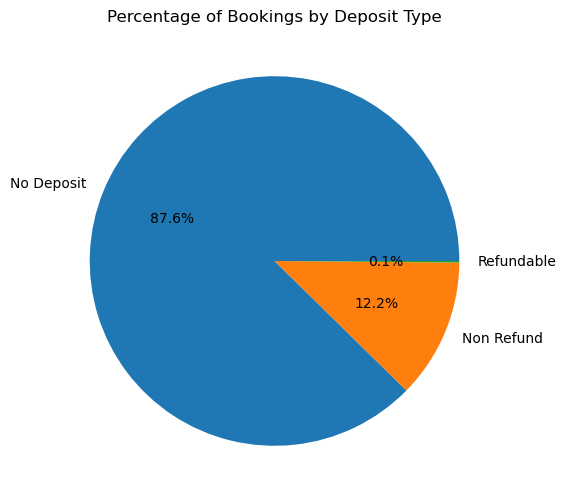

In [31]:
plt.figure(figsize=(10, 6))
plt.pie(deposit_type_bookings['percentage'], labels=deposit_type_bookings['deposit_type'], autopct='%1.1f%%')
plt.title('Percentage of Bookings by Deposit Type')
plt.show()

In [32]:
# Lets now explore cacellation percentage for each oft the deposit type

canceled_bookings = df[df['is_canceled'] == 1]
cancellation_percentage = canceled_bookings.groupby('deposit_type')['hotel'].count() / df.groupby('deposit_type')['hotel'].count() * 100
cancellation_percentage

deposit_type
No Deposit    28.377022
Non Refund    99.362446
Refundable    22.222222
Name: hotel, dtype: float64

In [33]:
cancellation_percentage = cancellation_percentage.reset_index()
cancellation_percentage.columns = ['deposit_type', 'cancellation_percentage']
print(cancellation_percentage)

  deposit_type  cancellation_percentage
0   No Deposit                28.377022
1   Non Refund                99.362446
2   Refundable                22.222222


In [34]:
# Calculate the total bookings count and cancellation percentage for each deposit type
deposit_type_bookings = df.groupby('deposit_type')['hotel'].count().reset_index()
deposit_type_cancellations = df[df['is_canceled'] == 1].groupby('deposit_type')['hotel'].count().reset_index()
deposit_type_cancellations['cancellation_percentage'] = (deposit_type_cancellations['hotel'] / deposit_type_bookings['hotel']) * 100


# Merge the two datasets
merged_data = pd.merge(deposit_type_bookings, deposit_type_cancellations, on='deposit_type', how='left')
merged_data['cancellation_percentage'] = merged_data['cancellation_percentage'].fillna(0)


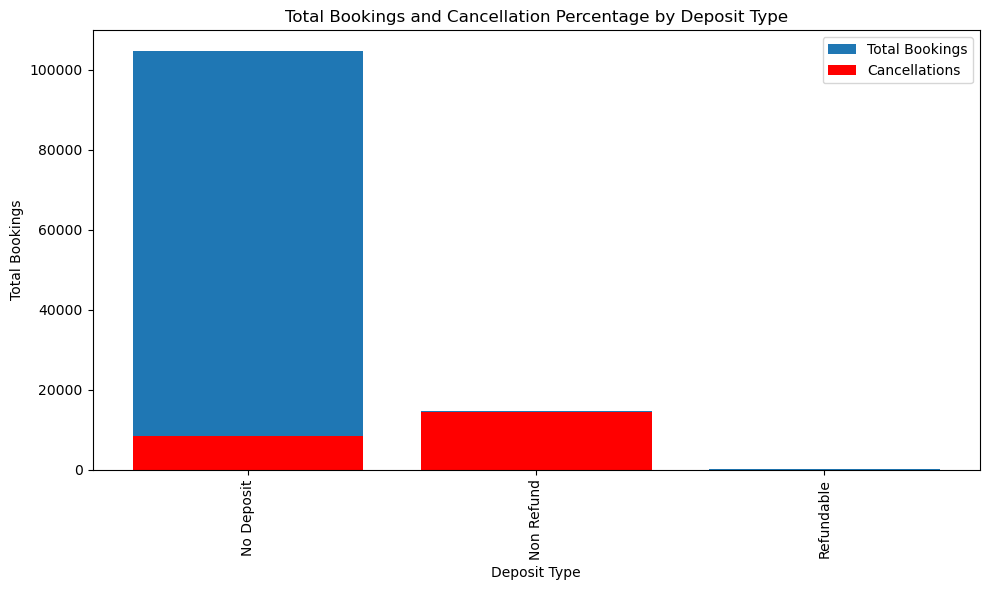

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['deposit_type'], merged_data['hotel_x'], label='Total Bookings')
plt.bar(merged_data['deposit_type'], merged_data['hotel_y'] * (merged_data['cancellation_percentage'] / 100), label='Cancellations', color='red')
plt.xlabel('Deposit Type')
plt.ylabel('Total Bookings')
plt.title('Total Bookings and Cancellation Percentage by Deposit Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

##### Surprisingly non rerundable deposits have most cancellations

## Encoding

In [36]:
# Month is stored as string, convert it to integer for supplying it to model
# Create a dictionary to map month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df.arrival_date_month = df.arrival_date_month.map(month_map)

In [37]:
df.arrival_date_month

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

In [38]:
obj_columns = df.columns[df.dtypes=='object'].to_list()
obj_columns

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [39]:
encoder = LabelEncoder();
for col in obj_columns:
    df[col] = encoder.fit_transform(df[col])


In [40]:
df.iloc[0:10].T

,0,1,2,3,4,5,6,7,8,9
hotel,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
is_canceled,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
lead_time,342.0,737.0,7.0,13.0,14.0,14.0,0.0,9.0,85.0,75.0
arrival_date_year,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0
arrival_date_month,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
arrival_date_week_number,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
arrival_date_day_of_month,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
stays_in_weekend_nights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stays_in_week_nights,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
adults,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

## Model selection

In [42]:
# Data split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
len(df_train) + len(df_test), len(df)

(119390, 119390)

In [43]:
y_train = df_train.pop('is_canceled')
y_test = df_test.pop('is_canceled')

In [44]:
len(y_train) + len(y_test)

119390

In [45]:
X_train = df_train
X_test = df_test

#### Decision Tree Classifier Model

In [46]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [48]:
y_pred = dt.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     14907
           1       0.84      0.55      0.66      8971

    accuracy                           0.79     23878
   macro avg       0.81      0.74      0.76     23878
weighted avg       0.80      0.79      0.78     23878



##### We got an accurarcy of 0.79 with max_depth of 5. Lets explore with different combinations of max depth and sample leaves combo to identify the best model

#### Using Grid Search CV

In [50]:
base_dt = DecisionTreeClassifier(random_state=42)

In [51]:
parameters = {
    "max_depth": [3,5,10,20],
    "min_samples_leaf": [10,20,50,100]
}

In [52]:
gs = GridSearchCV(estimator=base_dt, param_grid=parameters, n_jobs=-1, verbose=1, scoring="accuracy")

In [53]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: total: 8.67 s
Wall time: 21.1 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [54]:
best_dt = gs.best_estimator_

In [55]:
best_dt

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)

In [56]:
y_pred = best_dt.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     14907
           1       0.82      0.81      0.82      8971

    accuracy                           0.86     23878
   macro avg       0.86      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878



##### For max depth value 20 with min sample leaves being 10 we get an accuracy value of 0.86, which is an improvement.

### Using Random Classifier Model

In [58]:
base_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [59]:
parameters = {
    'max_depth': [3,5,10,20],
    'min_samples_leaf': [10,20,50,100],
    'n_estimators': [10, 25, 50]
}

In [60]:
gs = GridSearchCV(estimator=base_rf, param_grid=parameters, n_jobs=-1, verbose=1, scoring="accuracy")

In [61]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 42.8 s
Wall time: 3min 22s


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [62]:
best_rf = gs.best_estimator_

In [63]:
best_rf

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [64]:
y_pred = best_rf.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     14907
           1       0.89      0.77      0.83      8971

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878



###### Here we got a better accuracy compared to Decision tree

### Logistic Regression Model

In [68]:
lr = LogisticRegression(random_state=42, n_jobs=-1)

In [69]:
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [70]:
y_pred = lr.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80     14907
           1       0.69      0.54      0.61      8971

    accuracy                           0.74     23878
   macro avg       0.72      0.70      0.71     23878
weighted avg       0.73      0.74      0.73     23878



In [75]:
X_sample = df_test.iloc[10]
X_sample

hotel                                1.0
lead_time                          120.0
arrival_date_year                 2016.0
arrival_date_month                  12.0
arrival_date_week_number            53.0
arrival_date_day_of_month           26.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 3.0
adults                               2.0
children                             0.0
babies                               0.0
meal                                 0.0
country                             15.0
market_segment                       6.0
distribution_channel                 3.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
reserved_room_type                   3.0
assigned_room_type                   3.0
booking_changes                      0.0
deposit_type                         0.0
agent                              240.0
days_in_waiting_list                 0.0
customer_type   

In [79]:
y_test.iloc[10]

0

In [80]:
from sklearn.feature_extraction import DictVectorizer

In [122]:
dv = DictVectorizer()
dv

DictVectorizer()

In [139]:
## Now that we know RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,n_jobs=-1, random_state=42)
# gives best accuracy lets use that to develop a working model that can be used for the project
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.is_canceled
y_test = df_test.is_canceled
y_val = df_val.is_canceled

del df_train['is_canceled']
del df_val['is_canceled']
del df_test['is_canceled']

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [140]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [143]:
accuracy_score(y_val, y_pred)

0.8728955523913225

In [144]:
# now lets test the model with test data

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

y_pred_test = model.predict(X_test)

In [145]:
accuracy_score(y_test, y_pred_test)

0.8758271211994304

In [ ]:
# From above we see that for test data set also we get similaru accuracy score.

In [146]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     14907
           1       0.88      0.77      0.82      8971

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.87     23878

